In [2]:
using SciBmad, CairoMakie

In [55]:
ring = include("/Users/matthewsignorelli/Documents/ESR/v6.3.1/testconverter/esr-main-18GeV-1IP.jl");

In [21]:
tw = twiss(ring, spin=true)

Twiss:
 coasting_beam = true
 tunes[1:4]    = [Qx, Qy, slip, Qspin]
 table         has columns: beamline_index, name, s, phi_1, beta_1, alpha_1, phi_2, beta_2, alpha_2, phi_3, gamma_c, c11, c12, c21, c22, orbit_x, orbit_px, orbit_y, orbit_py, orbit_z, orbit_pz, n_x, n_y, n_z

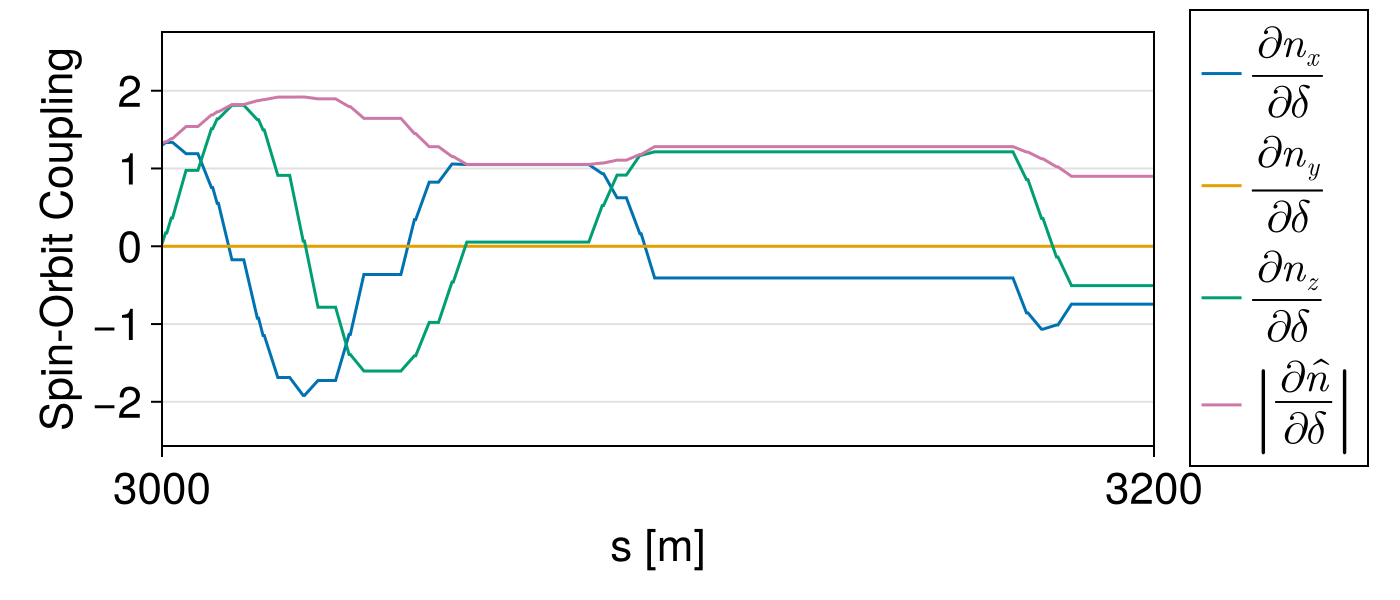

In [66]:
t = tw.table
dn_ddelta_x = -map(x->x[6], t.n_x)
dn_ddelta_y = -map(x->x[6], t.n_y)
dn_ddelta_z = -map(x->x[6], t.n_z)
dn_ddelta_amp = sqrt.(vec(sum(abs2, [dn_ddelta_x dn_ddelta_y dn_ddelta_z], dims=2)))

f = Figure(fontsize=22, size=(700,300));
ax = Axis(f[1, 1], xlabel="s [m]", ylabel="Spin-Orbit Coupling", xticks=0:200:4000);
lines!(ax, t.s, dn_ddelta_x, label=L"\frac{\partial n_x}{\partial\delta}"); # L".." specifies a LaTeX string
lines!(ax, t.s, dn_ddelta_y, label=L"\frac{\partial n_y}{\partial\delta}");
lines!(ax, t.s, dn_ddelta_z, label=L"\frac{\partial n_z}{\partial\delta}");
lines!(ax, t.s, dn_ddelta_amp, label=L"\left|\frac{\partial\hat{n}}{\partial\delta}\right|");
Legend(f[1, 2], ax);
xlims!(ax, 3000, 3200)
display(f);


In [60]:
foreach(x->x.tracking_method=Yoshida(num_steps=10), ring.line)

In [63]:
b0 = Bunch(vars(Descriptor(6,1))', TPS64[1 0 0 0])

Bunch{Float64, Float64, BeamTracking.Coords{Vector{UInt8}, LinearAlgebra.Adjoint{TPS64{GTPSA.Dynamic}, Vector{TPS64{GTPSA.Dynamic}}}, Matrix{TPS64{GTPSA.Dynamic}}}}(Species(Null), NaN, 0.0, BeamTracking.Coords{Vector{UInt8}, LinearAlgebra.Adjoint{TPS64{GTPSA.Dynamic}, Vector{TPS64{GTPSA.Dynamic}}}, Matrix{TPS64{GTPSA.Dynamic}}}(UInt8[0x01], 6-element LinearAlgebra.Adjoint{TPS64{GTPSA.Dynamic}, Vector{TPS64{GTPSA.Dynamic}}}:
Descriptor(NV=6, MO=1)
INDEX  COEFFICIENT             ORDER   EXPONENTS
----------------------------------------------------
  1:   1.0000000000000000E+00    1     1 0  0 0  0 0
----------------------------------------------------
  2:   1.0000000000000000E+00    1     0 1  0 0  0 0
----------------------------------------------------
  3:   1.0000000000000000E+00    1     0 0  1 0  0 0
----------------------------------------------------
  4:   1.0000000000000000E+00    1     0 0  0 1  0 0
----------------------------------------------------
  5:   1.00000000000000

In [64]:
track!(b0, ring)

Setting bunch.species = Species(electron, charge=-1.0e, mass=510998.95069 eV/c², spin=0.5ħ) (reference species from the Beamline)
Setting bunch.p_over_q_ref = -59.5287244902766 (reference p_over_q_ref from the Beamline)


Bunch{Float64, Float64, BeamTracking.Coords{Vector{UInt8}, LinearAlgebra.Adjoint{TPS64{GTPSA.Dynamic}, Vector{TPS64{GTPSA.Dynamic}}}, Matrix{TPS64{GTPSA.Dynamic}}}}(Species(electron, charge=-1.0e, mass=510998.95069 eV/c², spin=0.5ħ), -59.5287244902766, 1.2788861294459976e-5, BeamTracking.Coords{Vector{UInt8}, LinearAlgebra.Adjoint{TPS64{GTPSA.Dynamic}, Vector{TPS64{GTPSA.Dynamic}}}, Matrix{TPS64{GTPSA.Dynamic}}}(UInt8[0x01], 6-element LinearAlgebra.Adjoint{TPS64{GTPSA.Dynamic}, Vector{TPS64{GTPSA.Dynamic}}}:
Descriptor(NV=6, MO=1)
INDEX  COEFFICIENT             ORDER   EXPONENTS
----------------------------------------------------
  1:  -4.8053863879724425E-16    0     0 0  0 0  0 0
  1:   8.7604923933171008E-01    1     1 0  0 0  0 0
  1:   2.8468467782156459E-01    1     0 1  0 0  0 0
  1:   1.4360232052188003E-05    1     0 0  1 0  0 0
  1:  -4.9738055188874504E-07    1     0 0  0 1  0 0
  1:   2.0179172294160246E-04    1     0 0  0 0  0 1
-------------------------------------------

In [65]:
GTPSA.jacobian(vec(b0.coords.q))

4×6 Matrix{Float64}:
  8.82869        2.72666       -95.0983       -5.01202    0.0  -125.686
 12.7787       -32.7846       -453.939        10.2934     0.0    -0.00107481
  0.000815549    0.000337165   263.142       -29.7717     0.0    -1.5708
  6.1612e-6      1.90283e-6     -6.63141e-5   -3.5035e-6  0.0    -8.7712e-5

In [45]:
step = 1e-9
b0 = Bunch([0 0 0 0 0 step], [1. 0 0 0])
track!(b0, ring)

Setting bunch.species = Species(electron, charge=-1.0e, mass=510998.95069 eV/c², spin=0.5ħ) (reference species from the Beamline)
Setting bunch.p_over_q_ref = -59.5287244902766 (reference p_over_q_ref from the Beamline)


Bunch{Float64, Float64, BeamTracking.Coords{Vector{UInt8}, Matrix{Float64}, Matrix{Float64}}}(Species(electron, charge=-1.0e, mass=510998.95069 eV/c², spin=0.5ħ), -59.5287244902766, 1.2788861294459976e-5, BeamTracking.Coords{Vector{UInt8}, Matrix{Float64}, Matrix{Float64}}(UInt8[0x01], [2.022300355739518e-13 9.44488297999178e-15 … -2.3121926347243325e-9 1.0e-9], [5.72176695634586e-7 -2.956246403147364e-12 -1.3757959627486243e-9 -0.9999999999998153]))

In [46]:
n0_disp = (b0.coords.q[2:end]/norm(b0.coords.q[2:end])- scalar.([t.n_x[1], t.n_y[1], t.n_z[1]]))./step 

3-element Vector{Float64}:
 -0.0029572420470086774
 -1.5708031398217595
  0.0

In [47]:
t.n_x[1][6]

-0.0026407416362421972

In [48]:
t.n_y[1][6]

-1.5707985365680879

In [50]:
0.1365836535120214E-02/0.0026407416362421972

0.5172170258442297

In [41]:
t.n_z[1][6]

-3.0631698124075367e-10

In [19]:
foreach(x->x.Kn2 = 0, filter(x->x.kind=="Sextupole", ring.line))

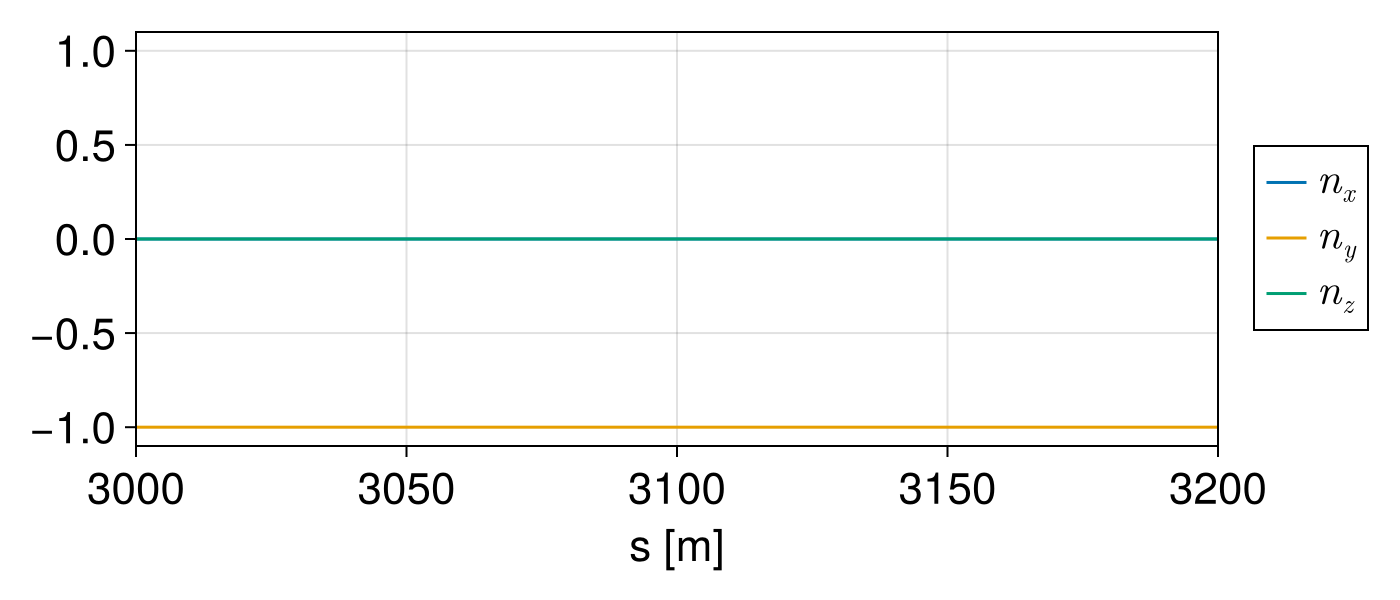

In [18]:
f = Figure(fontsize=22, size=(700,300));
ax = Axis(f[1, 1], xlabel="s [m]")#,xticks=0:200:4000);
lines!(ax, t.s, scalar.(t.n_x), label=L"n_x")
lines!(ax, t.s, scalar.(t.n_y), label=L"n_y")
lines!(ax, t.s, scalar.(t.n_z), label=L"n_z")
Legend(f[1, 2], ax);
xlims!(ax, 3000, 3200)
display(f);
